# Statistics for Entity Project Page Views

In [1]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
entity_project_page <- read.table("../results/entity_project_page_views.tsv", header=FALSE, sep="\t")

In [3]:
entity_views <- read.table("../results/entity_views.tsv", header=FALSE, sep="\t")

In [4]:
entity_project_page_views <- entity_project_page

## Correlation between Usages and Views

In [5]:
colnames(entity_project_page_views) <- c('entity_id','project','page_id','page_views')

In [6]:
summary(entity_project_page_views)

     entity_id                project            page_id        
 Q54919   :  2451812   commonswiki:33551149   Min.   :       0  
 Q423048  :  1968766   ruwiki     :24499918   1st Qu.:  662198  
 Q2597810 :  1937505   zhwiki     : 8302855   Median : 2578039  
 Q131454  :  1924192   enwiki     : 7988037   Mean   : 8250467  
 Q13219454:  1924125   svwiki     : 5961984   3rd Qu.: 6896287  
 Q36578   :  1917354   frwiki     : 5685580   Max.   :58444341  
 (Other)  :148679703   (Other)    :74813934                     
   page_views       
 Min.   :0.000e+00  
 1st Qu.:5.000e+00  
 Median :5.700e+01  
 Mean   :4.160e+03  
 3rd Qu.:5.160e+02  
 Max.   :8.888e+09  
                    

In [7]:
page_frequency_by_entity <- count(entity_project_page_views,entity_id)

In [8]:
colnames(page_frequency_by_entity) <- c('entity_id','page_usages')

In [9]:
summary(page_frequency_by_entity)

   entity_id         page_usages       
 P1     :       1   Min.   :      1.0  
 P10    :       1   1st Qu.:      1.0  
 P100   :       1   Median :      1.0  
 P1000  :       1   Mean   :      7.2  
 P10000 :       1   3rd Qu.:      3.0  
 P1001  :       1   Max.   :2451812.0  
 (Other):22250015                      

In [10]:
colnames(entity_views) <- c('entity_id','page_views')

In [11]:
entity_views_usage_frequency <- merge(entity_views, page_frequency_by_entity, by = "entity_id")

In [12]:
summary(entity_views_usage_frequency)

   entity_id          page_views         page_usages       
 P1     :       1   Min.   :0.000e+00   Min.   :      1.0  
 P10    :       1   1st Qu.:1.300e+01   1st Qu.:      1.0  
 P100   :       1   Median :1.360e+02   Median :      1.0  
 P1000  :       1   Mean   :3.006e+04   Mean   :      7.2  
 P10000 :       1   3rd Qu.:9.970e+02   3rd Qu.:      3.0  
 P1001  :       1   Max.   :1.253e+10   Max.   :2451812.0  
 (Other):22250015                                          

In [13]:
colnames(entity_views_usage_frequency) <- c('entity_id','page_views','page_usages')

In [14]:
head(entity_views_usage_frequency)

entity_id,page_views,page_usages
P1,1345,11
P10,26612,424
P100,1727,9
P1000,45259,287
P10000,331,2
P1001,6911712,1006


In [15]:
cor(entity_views_usage_frequency$page_views,entity_views_usage_frequency$page_usages, method="spearman")

[1] 0.2166726

In [16]:
page_view_and_usage_model <- lm(entity_views_usage_frequency$page_views ~ entity_views_usage_frequency$page_usages)

In [17]:
summary(page_view_and_usage_model)


Call:
lm(formula = entity_views_usage_frequency$page_views ~ entity_views_usage_frequency$page_usages)

Residuals:
       Min         1Q     Median         3Q        Max 
-3.983e+09 -1.900e+04 -1.688e+04 -1.656e+04  1.253e+10 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                              14768.502   1189.421   12.42   <2e-16
entity_views_usage_frequency$page_usages  2116.537      0.803 2635.88   <2e-16
                                            
(Intercept)                              ***
entity_views_usage_frequency$page_usages ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5610000 on 22250019 degrees of freedom
Multiple R-squared:  0.238,	Adjusted R-squared:  0.238 
F-statistic: 6.948e+06 on 1 and 22250019 DF,  p-value: < 2.2e-16


In [18]:
entity_view_means <- aggregate(entity_project_page_views$page_views, by=list(entity_project_page_views$entity_id), FUN=mean)

In [19]:
summary(entity_view_means)

    Group.1               x           
 P1     :       1   Min.   :       0  
 P10    :       1   1st Qu.:       9  
 P100   :       1   Median :      83  
 P1000  :       1   Mean   :    1527  
 P10000 :       1   3rd Qu.:     560  
 P1001  :       1   Max.   :20441060  
 (Other):22250015                     

In [20]:
colnames(entity_view_means) <- c('entity_id','page_view_mean')

In [21]:
entity_view_means_and_usages <- merge(page_frequency_by_entity, entity_view_means, by = "entity_id")

In [22]:
rm(page_frequency_by_entity)

In [23]:
rm(entity_view_means)

In [24]:
head(entity_view_means_and_usages)

entity_id,page_usages,page_view_mean
P1,11,122.27273
P10,424,62.76415
P100,9,191.88889
P1000,287,157.69686
P10000,2,165.50000
P1001,1006,6870.48907


In [25]:
cor(entity_view_means_and_usages$page_usages,entity_view_means_and_usages$page_view_mean, method="spearman")

[1] -0.003677232

In [26]:
entity_view_means_and_usages_model <- lm(entity_view_means_and_usages$page_usages ~ entity_view_means_and_usages$page_view_mean)

In [27]:
summary(entity_view_means_and_usages_model)


Call:
lm(formula = entity_view_means_and_usages$page_usages ~ entity_view_means_and_usages$page_view_mean)

Residuals:
    Min      1Q  Median      3Q     Max 
  -2585      -6      -6      -4 2451805 

Coefficients:
                                             Estimate Std. Error t value
(Intercept)                                 6.989e+00  3.170e-01  22.045
entity_view_means_and_usages$page_view_mean 1.561e-04  2.844e-05   5.488
                                            Pr(>|t|)    
(Intercept)                                  < 2e-16 ***
entity_view_means_and_usages$page_view_mean 4.06e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1481 on 22250019 degrees of freedom
Multiple R-squared:  1.354e-06,	Adjusted R-squared:  1.309e-06 
F-statistic: 30.12 on 1 and 22250019 DF,  p-value: 4.06e-08


### Sorted by highest view means

In [28]:
sorted_by_highest_view_means <- dplyr::arrange(entity_view_means_and_usages, desc(page_view_mean))

In [29]:
head(sorted_by_highest_view_means, n=10)

entity_id,page_usages,page_view_mean
Q5296,613,20441060
Q4652632,5,8667144
Q8042151,5,8018726
Q22713189,1,4983678
Q26769076,2,4659126
Q25136249,3,4328533
Q5589097,1,4306323
Q25999140,2,3983256
Q3546230,1,3974205
Q26832572,1,3847138


### Sorted by lowest view means

In [30]:
view_means_of_zero <-filter(entity_view_means_and_usages, page_view_mean == 0)

In [31]:
view_means_of_zero_sorted_by_page_usages <- dplyr::arrange(view_means_of_zero, desc(page_usages))

In [32]:
head(view_means_of_zero_sorted_by_page_usages, n=10)

entity_id,page_usages,page_view_mean
Q14334317,6,0
Q14960107,6,0
Q14963100,6,0
Q14964406,6,0
Q14967290,6,0
Q14967382,6,0
Q14969075,6,0
Q14970322,6,0
Q14970334,6,0
Q14970538,6,0


## Entities used once versus more than once 

In [33]:
used_once <- filter(entity_view_means_and_usages, page_usages == 1 ) 

In [34]:
used_more_than_once <- filter(entity_view_means_and_usages, page_usages > 0 ) 

In [35]:
mean(used_once$page_view_mean)

[1] 1348.709

In [36]:
mean(used_more_than_once$page_view_mean)

[1] 1527.053

# Determining if used and valuable properties are just in Wikidata

In [37]:
property_project_page_views <- filter(entity_project_page_views, substr(entity_id,1,1) == "P")

In [38]:
property_project_page_views_for_client_wikidata <- filter(property_project_page_views, project == "wikidatawiki")

In [39]:
head(property_project_page_views_for_client_wikidata)

entity_id,project,page_id,page_views
P1,wikidatawiki,18303,254
P1,wikidatawiki,3960194,80
P1,wikidatawiki,6403593,128
P1,wikidatawiki,21116203,330
P1,wikidatawiki,21278095,1
P1,wikidatawiki,21587519,9


In [40]:
nrow(property_project_page_views)

[1] 24342469

In [41]:
nrow(property_project_page_views_for_client_wikidata)

[1] 403671

In [42]:
nrow(property_project_page_views_for_client_wikidata)/nrow(property_project_page_views)

[1] 0.01658299

In [43]:
page_frequency_by_property <- count(property_project_page_views,entity_id)

In [44]:
wikidata_page_frequency_by_property <- count(property_project_page_views_for_client_wikidata, entity_id)

In [45]:
colnames(page_frequency_by_property) <- c('property_id','page_usages')

In [46]:
colnames(wikidata_page_frequency_by_property) <- c('property_id','wikidata_page_usages')

In [47]:
page_frequency_by_property_merged <- merge(wikidata_page_frequency_by_property,page_frequency_by_property)

In [48]:
page_frequency_by_property_merged$wikidata_average <- page_frequency_by_property_merged$wikidata_page_usages/page_frequency_by_property_merged$page_usages

In [49]:
head(page_frequency_by_property_merged)

property_id,wikidata_page_usages,page_usages,wikidata_average
P1,7,11,0.6363636
P10,327,424,0.7712264
P100,8,9,0.8888889
P1000,284,287,0.9895470
P10000,2,2,1.0000000
P1001,344,1006,0.3419483


In [50]:
summary(page_frequency_by_property_merged$wikidata_average)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0001314 0.5000000 0.8333000 0.6814000 0.9500000 1.0000000 

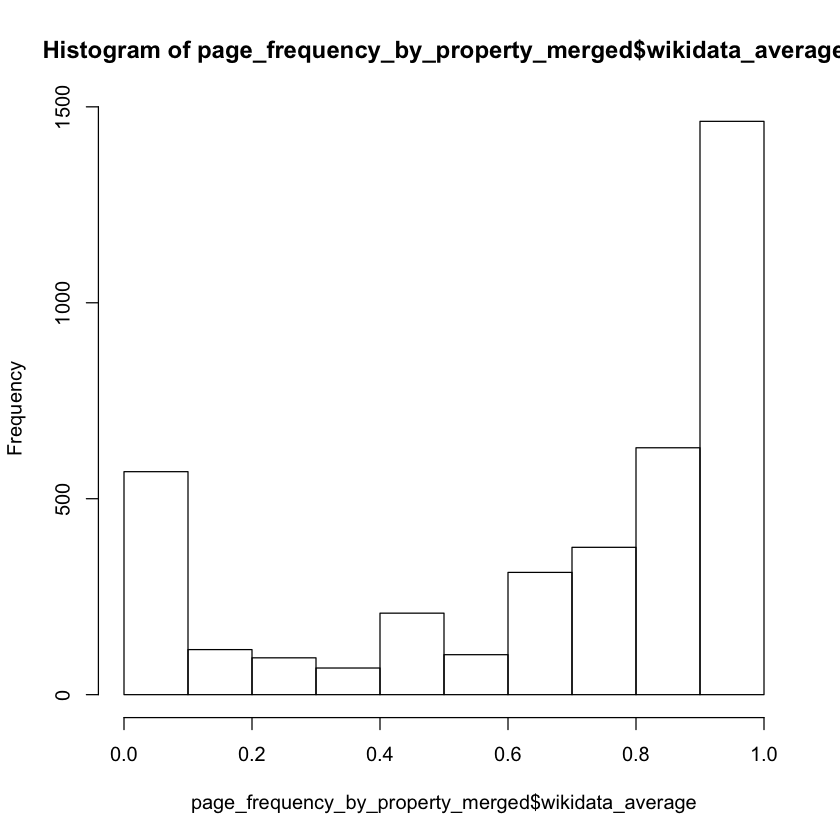

In [51]:
hist(page_frequency_by_property_merged$wikidata_average)

In [52]:
page_frequency_by_property_merged_sorted_by_wikidata_average <- dplyr::arrange(page_frequency_by_property_merged, wikidata_average)

In [53]:
head(page_frequency_by_property_merged_sorted_by_wikidata_average, n=25)

property_id,wikidata_page_usages,page_usages,wikidata_average
P2046,69,525134,0.0001313950
P1543,7,46125,0.0001517615
P2044,54,275801,0.0001957933
P1705,123,504353,0.0002438768
P1688,25,81811,0.0003055824
P281,315,723276,0.0004355184
P1249,198,422683,0.0004684362
P473,244,485486,0.0005025892
P1566,118,234685,0.0005028016
P884,19,34500,0.0005507246


In [54]:
head(property_project_page_views_for_client_wikidata)

entity_id,project,page_id,page_views
P1,wikidatawiki,18303,254
P1,wikidatawiki,3960194,80
P1,wikidatawiki,6403593,128
P1,wikidatawiki,21116203,330
P1,wikidatawiki,21278095,1
P1,wikidatawiki,21587519,9


In [55]:
property_project_page_views_for_client_wikidata_summed <- aggregate(property_project_page_views_for_client_wikidata$page_views, by=list(property_project_page_views_for_client_wikidata$entity_id), FUN=sum)

In [70]:
property_project_page_views_summed <- aggregate(property_project_page_views$page_views, by=list(property_project_page_views$entity_id), FUN=sum)

In [73]:
colnames(property_project_page_views_summed) <- c('property_id','page_views')

In [74]:
head(property_project_page_views_summed)

property_id,page_views
P1,1345
P10,26612
P100,1727
P1000,45259
P10000,331
P1001,6911712


In [75]:
colnames(property_project_page_views_for_client_wikidata_summed) <- c('property_id','wikidata_page_views')

In [76]:
head(property_project_page_views_for_client_wikidata_summed)

property_id,wikidata_page_views
P1,806
P10,22135
P100,1645
P1000,45011
P10000,331
P1001,91660


In [94]:
property_summed_views <- merge(property_project_page_views_for_client_wikidata_summed,property_project_page_views_summed)

In [100]:
property_summed_views$non_wikidata_page_views <- property_summed_views$page_views - property_summed_views$wikidata_page_views

In [101]:
page_frequency_by_property_merged_and_summed_views <- merge(property_summed_views,page_frequency_by_property_merged)

In [102]:
nrow(page_frequency_by_property_merged_and_summed_views)

[1] 3937

In [105]:
page_frequency_by_property_merged_and_summed_views_sorted_by_page_views <- dplyr::arrange(page_frequency_by_property_merged_and_summed_views, desc(non_wikidata_page_views))

In [107]:
page_frequency_by_property_merged_and_summed_views_sorted_by_page_views$non_wikidata_page_usages <- page_frequency_by_property_merged_and_summed_views_sorted_by_page_views$page_usages - page_frequency_by_property_merged_and_summed_views_sorted_by_page_views$wikidata_page_usages

In [108]:
head(page_frequency_by_property_merged_and_summed_views_sorted_by_page_views, n=25)

property_id,wikidata_page_views,page_views,non_wikidata_page_views,wikidata_page_usages,page_usages,wikidata_average,non_wikidata_page_usages
P373,160205,6531371917,6531211712,873,1331718,0.0006555442,1330845
P18,217294,5304100266,5303882972,1207,764223,0.0015793819,763016
P856,137822,5143708396,5143570574,728,1169632,0.0006224180,1168904
P570,196788,3230549347,3230352559,899,280091,0.0032096711,279192
P31,1140181,3153325528,3152185347,6965,280795,0.0248045727,273830
P345,360345,3064724376,3064364031,589,218339,0.0026976399,217750
P19,140107,2851053904,2850913797,1284,431216,0.0029776261,429932
P1559,168314,2571114971,2570946657,356,326371,0.0010907832,326015
P166,141820,2545366245,2545224425,685,317367,0.0021583845,316682
P20,61667,2497532842,2497471175,456,350254,0.0013019123,349798
